<a href="https://colab.research.google.com/github/riddik0331/IndexPage/blob/main/ML_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 Cel zadania
Na podstawie danych gościa (płeć, miejscowość pochodzenia oraz cena za dobę) zbuduj model klasyfikacyjny, który przewidzi **dzień tygodnia**, w którym gość przyjechał do hotelu.

---

## 📂 Dane wejściowe
Plik `hotel_klasyfikacja.csv`, zawierający informacje o rezerwacjach hotelowych.

Najważniejsze kolumny:
- `plec` – płeć gościa (`M` lub `K`),
- `miejscowosc` – miejscowość pochodzenia gościa,
- `cena_za_dobe` – cena zapłacona za dobę,
- `dzien_tygodnia` – dzień tygodnia, w którym gość przyjechał.

---

## 🔧 Zakres prac

1. **Wczytaj dane i zapoznaj się z ich strukturą.**
2. **Wybierz cechy wejściowe:** `plec`, `miejscowosc`, `cena_za_dobe`.
3. **Zakoduj dane kategoryczne** (`plec`, `miejscowosc`, `dzien_tygodnia`) przy pomocy `LabelEncoder`.
4. **Podziel dane** na zbiory: treningowy i testowy (`train_test_split`).
5. **Zbuduj i przetestuj trzy modele klasyfikacyjne:**
   - `RandomForestClassifier`
   - `LogisticRegression`
   - `KNeighborsClassifier`
6. **Oceń skuteczność modeli:**
   - metryka dokładności (`accuracy_score`)
   - raport klasyfikacji (`classification_report`)
7. **Dla modelu Random Forest wypisz ważność cech** (`feature_importances_`).
8. **Przetestuj działanie modelu na nowym przypadku:**

   > Przykład: kobieta z Krakowa, cena za dobę 320 zł → przewidź dzień tygodnia.

---

## 💡 Wskazówki techniczne

- Do kodowania zmiennych tekstowych użyj `LabelEncoder`.
- Pamiętaj, aby przy przewidywaniu nowych przypadków używać tych samych encoderów co wcześniej.
- Wybierz model o najwyższej skuteczności do prognozowania nowych danych.

---

## 🎓 Rozszerzenie (dla chętnych)

- Przetestuj więcej przypadków i sprawdź, jak zmiana miejscowości lub ceny wpływa na wynik.
- Dodaj dodatkowe cechy, np. `standard` lub `nr_pokoju`, i sprawdź, czy poprawiają skuteczność.
- Zrób wykresy rozkładu dni tygodnia względem płci lub miasta (`seaborn`, `matplotlib`).



**Zanim zaczniesz zapoznaj się jeszcze z materiałem poniżej:**

In [1]:
# 📌 Co to jest LabelEncoder?
# LabelEncoder zamienia wartości tekstowe (np. 'M', 'K') na wartości liczbowe (np. 1, 0).
# Jest to wymagane w wielu algorytmach ML, które operują na liczbach, a nie na tekstach.

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Mamy dane kategoryczne (tekstowe)
plec = pd.Series(["M", "K", "K", "M", "K"])

# Tworzymy obiekt kodera
encoder = LabelEncoder()

# Uczymy kodera na danych i zamieniamy tekst na liczby
plec_zakodowane = encoder.fit_transform(plec)

# Wyświetlamy wyniki
print("Oryginalne dane:")
print(plec.tolist())
print("\nZakodowane dane:")
print(plec_zakodowane.tolist())

# Możemy także sprawdzić, jak wygląda mapa etykiet:
print("\nUnikalne klasy:", encoder.classes_)

# Odtworzenie oryginalnych danych z wartości liczbowych
print("Odwrotne kodowanie:", encoder.inverse_transform(plec_zakodowane))

Oryginalne dane:
['M', 'K', 'K', 'M', 'K']

Zakodowane dane:
[1, 0, 0, 1, 0]

Unikalne klasy: ['K' 'M']
Odwrotne kodowanie: ['M' 'K' 'K' 'M' 'K']


Cecha: wiek            | Ważność: 0.2809
Cecha: dochód          | Ważność: 0.4270
Cecha: liczba_dzieci   | Ważność: 0.2921


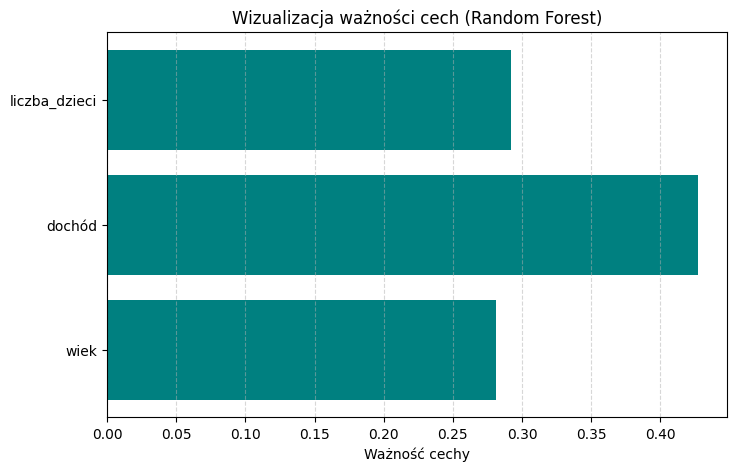

In [2]:
# 📌 Co to jest ważność cech w Random Forest?
# Wartości ważności cech (feature_importances_) wskazują,
# jak duży wpływ każda cecha miała na decyzje podejmowane przez model.
# Wartości te są zawsze z przedziału [0, 1], a ich suma wynosi 1.
# Cecha o najwyższej wartości była najczęściej wykorzystywana
# w podziałach drzewa i miała największy wpływ na predykcję.
# Dzięki analizie ważności cech można:
# - lepiej zrozumieć, które dane są istotne,
# - uprościć model usuwając mało ważne cechy,
# - poprawić interpretowalność wyników.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Przykładowe dane wejściowe (X) i etykiety (y)
X = pd.DataFrame({
    "wiek": [25, 30, 45, 50, 23],
    "dochód": [3000, 4000, 6000, 8000, 2000],
    "liczba_dzieci": [0, 1, 2, 3, 0]
})
y = [0, 1, 1, 1, 0]  # Klasa: 0 – nie kupił, 1 – kupił

# Tworzenie i trenowanie modelu Random Forest
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

# Obliczenie ważności cech
importances = model.feature_importances_

# Wyświetlenie ważności w formie tekstowej
for cecha, waga in zip(X.columns, importances):
    print(f"Cecha: {cecha:15} | Ważność: {waga:.4f}")


# 📊 Wykres ważności cech
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances, color='teal')
plt.xlabel("Ważność cechy")
plt.title("Wizualizacja ważności cech (Random Forest)")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


**Rozwiązanie zadania**

In [3]:
# 1. Import bibliotek
# Importujemy niezbędne biblioteki do wczytywania danych, przygotowania modelu i oceny wyników
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# 2. Wczytanie danych
# Wczytujemy dane z pliku CSV zawierające informacje o rezerwacjach hotelowych
# https://drive.google.com/file/d/1oMPla7v9OG-RNCPdeQWkown9dQTeeFRA

gdown.download('https://drive.google.com/uc?id=1oMPla7v9OG-RNCPdeQWkown9dQTeeFRA', 'hotel_klasyfikacja.csv')

dane = pd.read_csv('hotel_klasyfikacja.csv')


Downloading...
From: https://drive.google.com/uc?id=1oMPla7v9OG-RNCPdeQWkown9dQTeeFRA
To: /content/hotel_klasyfikacja.csv
100%|██████████| 79.7k/79.7k [00:00<00:00, 38.7MB/s]


In [5]:
# 3. Podstawowa eksploracja danych
# Sprawdzamy informacje o kolumnach oraz pierwsze rekordy, aby zapoznać się z danymi
print(dane.info())
print(dane.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imie            1030 non-null   object 
 1   nazwisko        1030 non-null   object 
 2   miejscowosc     1030 non-null   object 
 3   plec            1030 non-null   object 
 4   nr_pokoju       1030 non-null   int64  
 5   data_przyjazdu  1030 non-null   object 
 6   dzien_tygodnia  1030 non-null   object 
 7   standard        1030 non-null   object 
 8   cena_za_dobe    1030 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 72.6+ KB
None
      imie    nazwisko miejscowosc plec  nr_pokoju data_przyjazdu  \
0    Pawel  Markiewicz      Lowicz    M        101     2022-07-04   
1   Marcin       Borek      Rybnik    M        101     2022-07-07   
2   Joanna       Benko     Wroclaw    K        101     2022-07-11   
3     Adam   Pohorecki       Opole    M        101     

In [6]:
# 4. Przygotowanie danych (wybór cech i etykiety)
dane = dane[['plec', 'miejscowosc', 'cena_za_dobe', 'dzien_tygodnia']]
print(dane)
# Kodowanie zmiennych kategorycznych
# Zamieniamy dane tekstowe na wartości liczbowe
encoders = {}
for col in ['plec', 'miejscowosc', 'dzien_tygodnia']:
    label_encoder = LabelEncoder()
    dane[col] = label_encoder.fit_transform(dane[col])
    encoders[col] = label_encoder

# Wybieramy zmienne niezależne (cechy) i zmienną zależną (etykietę)
# X = dane.drop('dzien_tygodnia', axis=1)
# y = dane['dzien_tygodnia']
X = dane.iloc[:, :-1]
y = dane.iloc[:, -1]
print(X)
print(y)


     plec       miejscowosc  cena_za_dobe dzien_tygodnia
0       M            Lowicz         220.0   poniedziałek
1       M            Rybnik         220.0       czwartek
2       K           Wroclaw         220.0   poniedziałek
3       M             Opole         220.0         sobota
4       M           Gliwice         220.0      niedziela
...   ...               ...           ...            ...
1025    K           Chorzow         600.0   poniedziałek
1026    M            Kalisz         600.0   poniedziałek
1027    M            Kielce         600.0         sobota
1028    K  Dabrawa Gornicza         600.0         sobota
1029    M            Krakow         600.0         wtorek

[1030 rows x 4 columns]
      plec  miejscowosc  cena_za_dobe
0        1           29         220.0
1        1           46         220.0
2        0           64         220.0
3        1           39         220.0
4        1           13         220.0
...    ...          ...           ...
1025     0            6  

<ipython-input-6-3086ce38272a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane[col] = label_encoder.fit_transform(dane[col])
<ipython-input-6-3086ce38272a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane[col] = label_encoder.fit_transform(dane[col])
<ipython-input-6-3086ce38272a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [7]:
# 5. Podział na zbiory treningowy i testowy
# Dzielimy dane na część do trenowania modelu i część testową

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [8]:
# 6. Klasyfikatory
# Tworzymy modele, które będziemy testować
# Tworzymy model RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Tworzymy model LogisticRegression
model_lr = LogisticRegression(max_iter=10000)

# Tworzymy model KNeighborsClassifier
model_kn = KNeighborsClassifier()


In [9]:
# 7. Trenowanie i ocena
# Dla każdego modelu trenujemy go na danych treningowych, przewidujemy wyniki i oceniamy skuteczność
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)
model_kn.fit(X_train, y_train)

# Testowanie modelu
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, zero_division=0)

y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, zero_division=0)

y_pred_kn = model_kn.predict(X_test)
accuracy_kn = accuracy_score(y_test, y_pred_kn)
report_kn = classification_report(y_test, y_pred_kn, zero_division=0)

print("Dokładność modelu Random Forest:", round(accuracy_rf * 100, 2), "%")
print("Raport klasyfikacji:\n", report_rf)
print("Dokładność modelu Logistic Regression:", round(accuracy_lr * 100, 2), "%")
print("Raport klasyfikacji:\n", report_lr)
print("Dokładność modelu KNeighbors Classifier:", round(accuracy_kn * 100, 2), "%")
print("Raport klasyfikacji:\n", report_kn)


Dokładność modelu Random Forest: 18.93 %
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.06      0.04      0.05        23
           1       0.27      0.37      0.31        49
           2       0.22      0.24      0.23        37
           3       0.08      0.09      0.08        23
           4       0.17      0.15      0.16        40
           5       0.07      0.05      0.06        22
           6       0.33      0.17      0.22        12

    accuracy                           0.19       206
   macro avg       0.17      0.16      0.16       206
weighted avg       0.18      0.19      0.18       206

Dokładność modelu Logistic Regression: 20.39 %
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.34      0.22      0.27        49
           2       0.18      0.78      0.29        37
           3       0.00      0.00      0.00        23


In [10]:
# 8. Ważność cech - tylko dla Random Forest
# Sprawdzamy, które cechy miały największy wpływ na decyzje klasyfikatora Random Forest
importances = model_rf.feature_importances_
print("Ważność cech w modelu Random Forest:")
for feature, importance in zip(X.columns, importances):
  print(f"{feature}: {round(importance, 2)}")


Ważność cech w modelu Random Forest:
plec: 0.02
miejscowosc: 0.83
cena_za_dobe: 0.15


In [11]:
# 9. Przykład klasyfikacji nowego przypadku
# Tworzymy przykładowe dane: kobieta z Warszawy, cena za dobę 320 zł
nowe_dane = pd.DataFrame({
    "plec": ["K"],
    "miejscowosc": ["Krakow"],
    "cena_za_dobe": [320.0]
})


In [12]:
print(nowe_dane['plec'].dtype == 'int64')

False


In [13]:
# 10. Przewidujemy dzień tygodnia modelem RandomForest
# Koduje wartości tekstowe zgodnie z wcześniej utworzonymi koderami
for elem in ['plec', 'miejscowosc']:
  if nowe_dane[elem].dtype != 'int64':  #  Zapewnienie przypadku, gdy dane zostały już transkodowane
    nowe_dane[elem] = encoders[elem].transform(nowe_dane[elem])

# Przewidywanie dnia tygodnia
prediction = model_rf.predict(nowe_dane)
predict_day = encoders['dzien_tygodnia'].inverse_transform(prediction)
print("Przewidywany dzień tygodnia -", *predict_day)


Przewidywany dzień tygodnia - niedziela
